# Linear regression model for predicting medical expenses based on insurance data

### In this study, we aim to find a correlation between medical expenses and different factors using insurance data of different people with attributes such as smoking, age, number of children, region and BMI 

## About the Data

### Column - Description
Age - Age of primary beneficiary

Sex	- Insurance contractor gender. female/ male

BMI	- Body mass index, provides an understanding of body.

Children - Number of children covered by insurance

Smoker - If Insurance primary smokes

Region - The beneficiary’s residential area in the US.

Charges - Individual medical costs billed by health insurance


## Methodology

### The method used is regression analysis, which tries to try to fit a predictive model to the data and then use that model to predict an outcome variable from one or more independent predictor variables.
 

### We used multiple regression to create different models and then used ANOVA to compare the different models and find the best-fit model.




# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import chart_studio.plotly as py

In [3]:
import cufflinks as cf

In [4]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [5]:
cf.go_offline()

# Uploading the Data

In [124]:
data = pd.read_csv("E:\\Praxis\\College_ppt\\Statistics-SS&SRC\\Project\\datasets_13720_18513_insurance.csv")

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
data2=data.copy()

## Checking for null Values

In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
data.sex.unique()

array(['female', 'male'], dtype=object)

In [13]:
data.smoker.unique()

array(['yes', 'no'], dtype=object)

In [14]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [121]:
data.shape

(1338, 9)

# EDA 


## Univariate Analysis

Text(0.5, 1.0, 'Age Distribution')

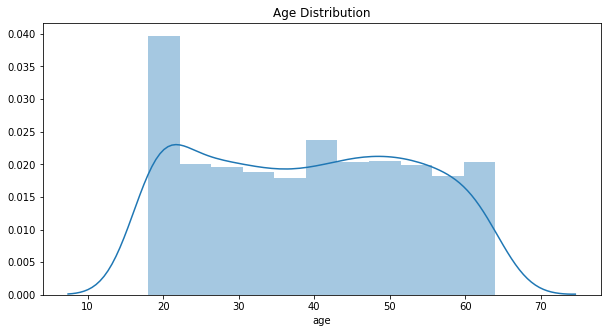

In [15]:
plt.figure(figsize=(10,5))
sns.distplot(data['age'])
plt.tight_layout
plt.title("Age Distribution")

## Analysis

### For the plot it can be inferred that the Age does not show skewness

Text(0.5, 1.0, 'Sex Count')

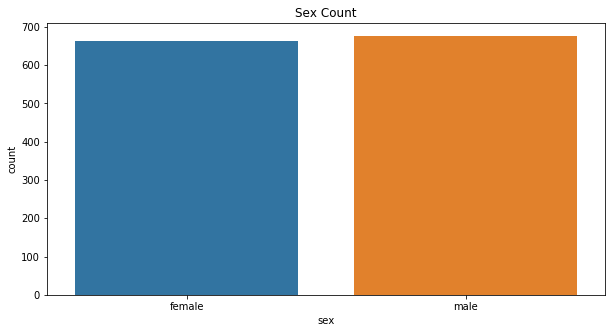

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data['sex'])

plt.tight_layout
plt.title("Sex Count")

## Analysis

### The histogram shows that male and female in the dataset are almost equal.

Text(0.5, 1, 'BMI Distribution')

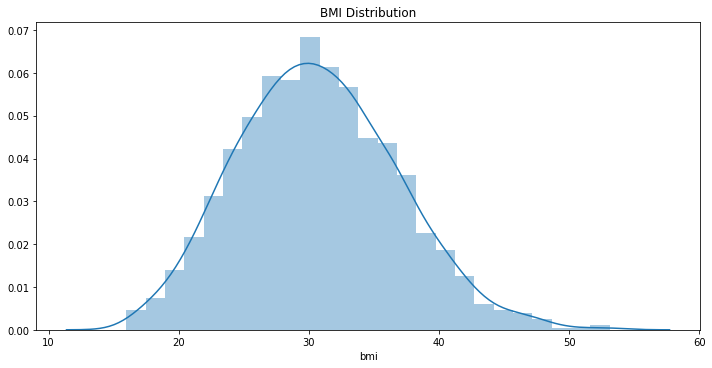

In [17]:
plt.figure(figsize=(10,5))
sns.distplot(data['bmi'])

plt.tight_layout()
plt.title("BMI Distribution")

## Analysis

### BMI is normally distributed.

Text(0.5, 1.0, 'No of Children')

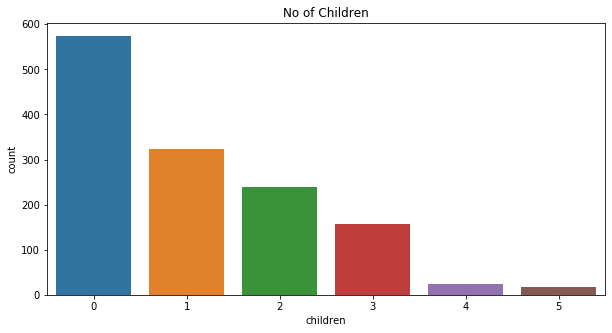

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data['children'])

plt.tight_layout
plt.title("No of Children")

## Analysis

### The histogram shows that insurance covered for no. of childern is decreasing from 0 - 6

Text(0.5, 1.0, 'Smokers Vs non-Smokers')

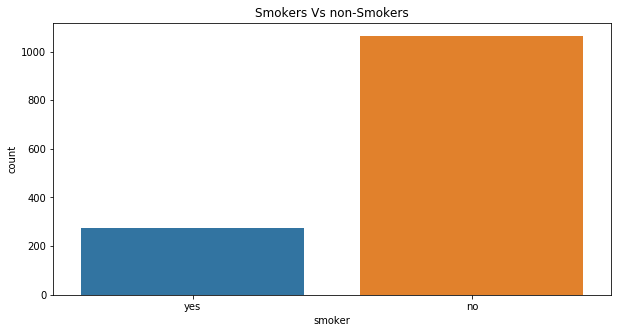

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data['smoker'])

plt.tight_layout
plt.title("Smokers Vs non-Smokers")

## Analysis

### The no of smokers is less as compared to non-smokers in the dataset

Text(0.5, 1.0, 'Region Count')

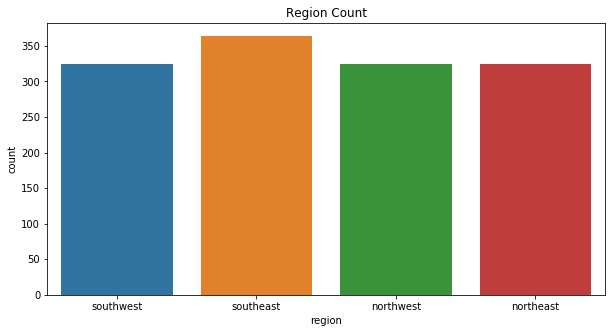

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data['region'])

plt.tight_layout
plt.title("Region Count")

## Analysis

### The dataset is almost equal in terms of region

Text(0.5, 1, 'Medical Charges Distribution Using LOG Transformation')

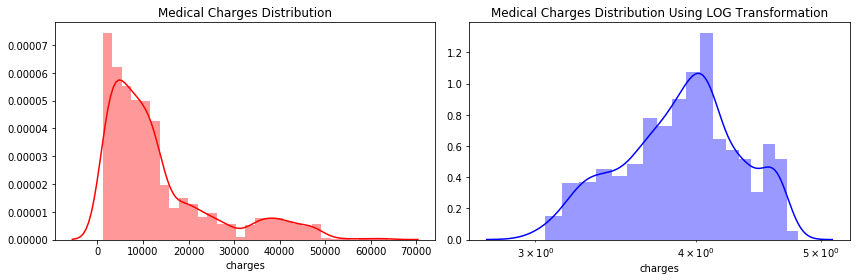

In [21]:
f= plt.figure(figsize=(12,4))
ax = f.add_subplot(121)
sns.distplot(data['charges'], color = 'r')
plt.title("Medical Charges Distribution")

ax=f.add_subplot(122)
sns.distplot(np.log10(data['charges']), color = 'b')

ax.set_xscale('log')
plt.tight_layout()
plt.title("Medical Charges Distribution Using LOG Transformation")

## Analysis

### The distribution for the Charges is skewed. Moreover in the second plot after using the log values the charges distribution looks similar to normal distribution to an extent.

## Bivariate Analysis

Text(0.5, 1, 'Age Vs Medical Charges')

<Figure size 864x360 with 0 Axes>

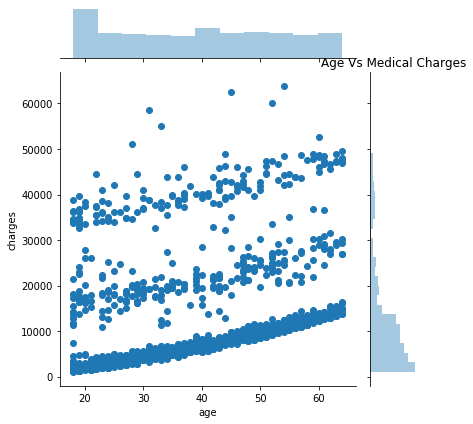

In [22]:
plt.figure(figsize=(12,5))
sns.jointplot(x='age', y='charges', data=data)


plt.tight_layout()
plt.title("Age Vs Medical Charges")

## Analysis 

### Trend shows that as the age increases the charges also increases

Text(0.5, 1, 'Sex Vs Medical Charges')

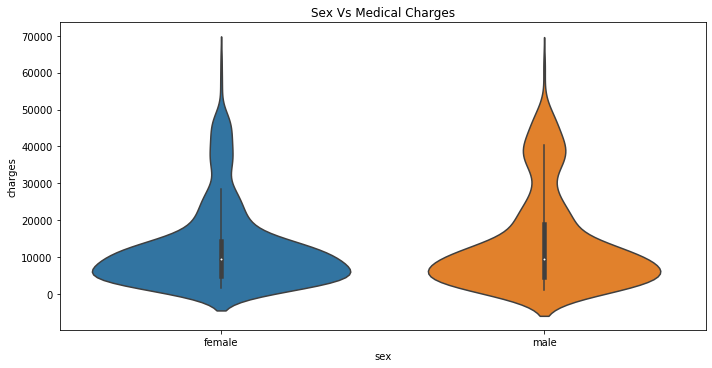

In [23]:
plt.figure(figsize=(10,5))
sns.violinplot(x='sex', y= 'charges', data=data)
plt.tight_layout()
plt.title("Sex Vs Medical Charges")

## Analysis

### The insurance charge for male and female is approximately in same range. 
### Gender seems to have next to no influence on the charge as the mean medical expenses of both sexes seems nearly equal.


Text(0.5, 1, 'Somker Vs Medical Charges')

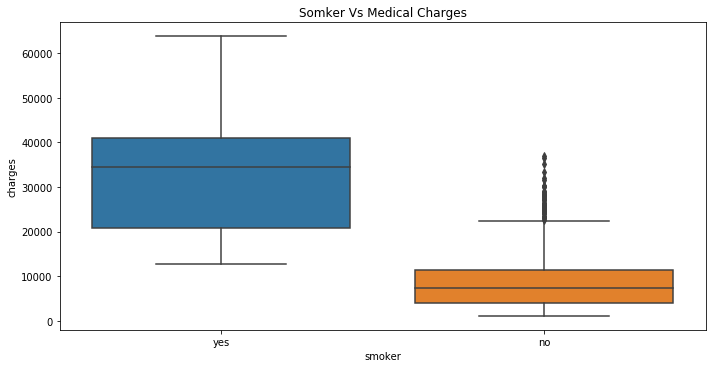

In [125]:
plt.figure(figsize=(10,5))
sns.boxplot(x='smoker', y= 'charges', data=data)

plt.tight_layout()
plt.title("Somker Vs Medical Charges")

## Analysis

### Insurance charge for smokers is much wide range compare to non smokers
### There seems to be a strong correlation between smoking and medical charges, from the violin plot one can clearly make out the fact that a smoker nearly pays 4 times the medical expenses when compared to a non-smoker.


Text(0.5, 1, 'Children vs Charges')

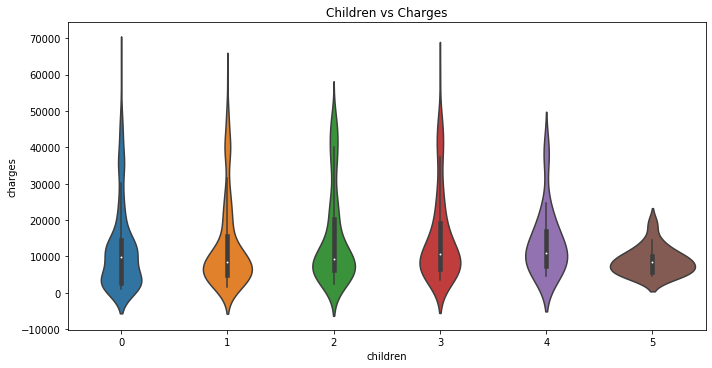

In [25]:
plt.figure(figsize=(10,5))
sns.violinplot(x='children', y= 'charges', data=data) 

plt.tight_layout()
plt.title("Children vs Charges")

In [26]:
data.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


## Analysis

### From the plot and the min-max-mean value for the medical charges table we can infer that the as the number of children increases, minimum charges increases  whereas in case for the maximum charge is shows the inverse trends. 
### Correlation between the number of children and charge shows a mild relation

Text(0.5, 1, 'Region Vs Medical Charges')

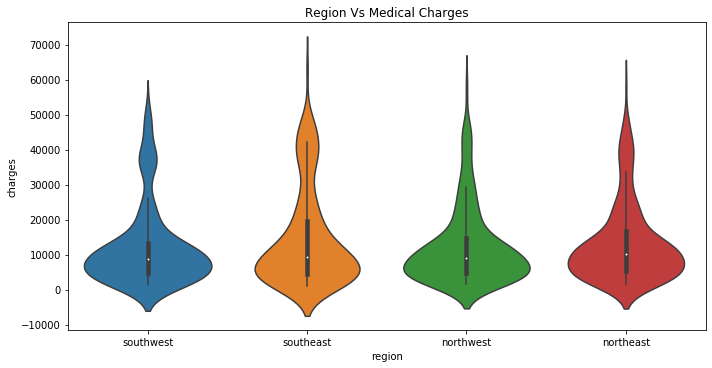

In [27]:
plt.figure(figsize=(10,5))
sns.violinplot(x='region',y='charges', data=data)

plt.tight_layout()
plt.title("Region Vs Medical Charges")

In [28]:
data.groupby('region').agg(['mean','min','max'])['charges']

,mean,min,max
region,,,
northeast,13406.384516,1694.7964,58571.07448
northwest,12417.575374,1621.3402,60021.39897
southeast,14735.411438,1121.8739,63770.42801
southwest,12346.937377,1241.5650,52590.82939


## Analysis

### the region also seems to have no effect on the medical charges in any significant way.

Text(0.5, 1, 'BMI Vs Medical Charges')

<Figure size 720x360 with 0 Axes>

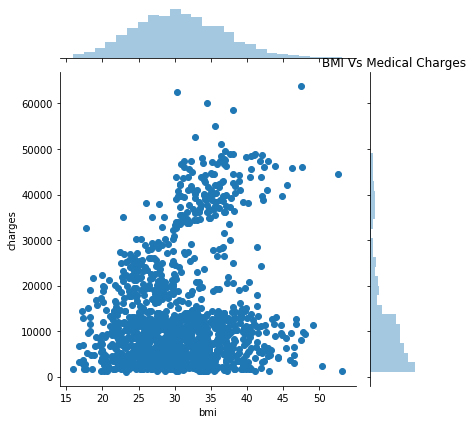

In [29]:
plt.figure(figsize=(10,5))
sns.jointplot(x='bmi', y='charges', data=data)

plt.tight_layout()
plt.title("BMI Vs Medical Charges")

## Analysis

### In BMI vs charge, there seems to be no discernible pattern, but an increase in BMI seems to hold some correlation to charges

## Multivariate Analysis

## Comparison with respect to Sex as hue parameter

Text(0.5, 1, 'Children Vs Medical Charges - Category- Sex')

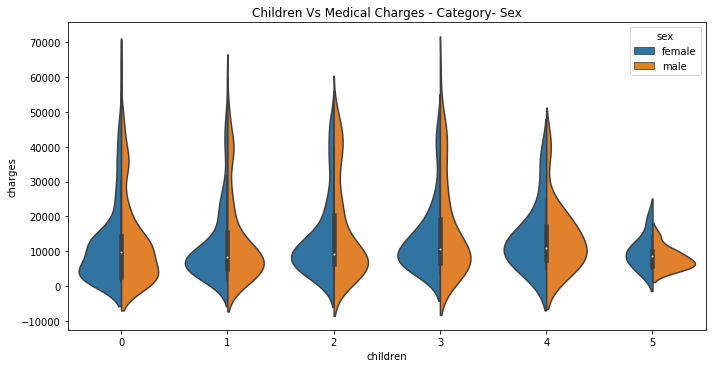

In [30]:
plt.figure(figsize=(10,5))
sns.violinplot(x='children', y= 'charges', data=data, hue='sex', split=True)
plt.tight_layout()
plt.title("Children Vs Medical Charges - Category- Sex")

Text(0.5, 1, 'Region Vs Medical Charges - Category- Sex')

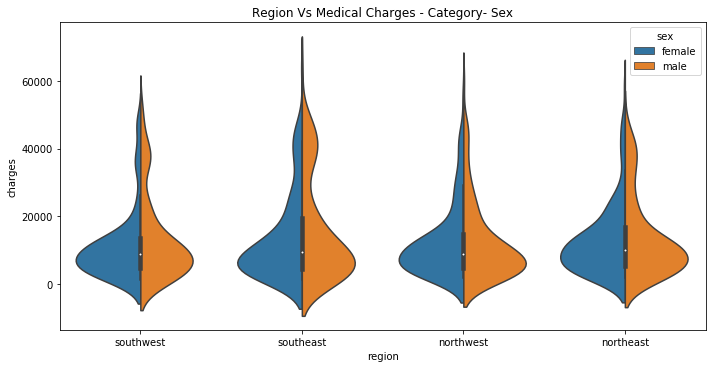

In [31]:
plt.figure(figsize=(10,5))
sns.violinplot(x='region', y= 'charges', data=data, hue='sex', split=True)

plt.tight_layout()
plt.title("Region Vs Medical Charges - Category- Sex")

Text(0.5, 1, 'BMI Vs Medical Charges - Category- Sex')

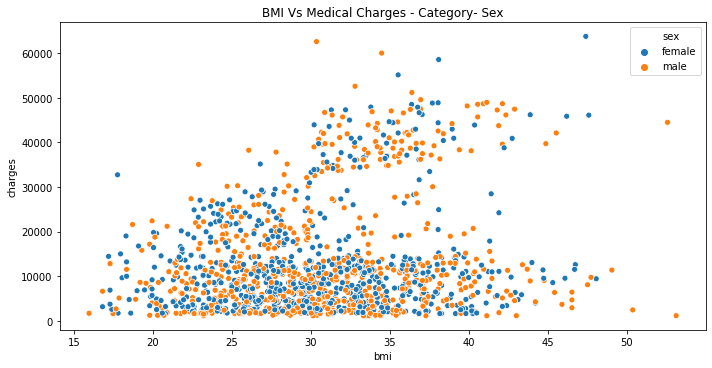

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='bmi', y= 'charges', data=data, hue='sex')

plt.tight_layout()
plt.title("BMI Vs Medical Charges - Category- Sex")

Text(0.5, 1, 'Age Vs Medical Charges - Category- Sex')

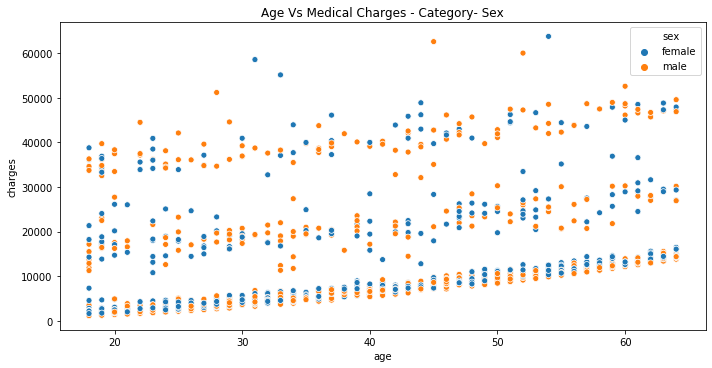

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='age', y= 'charges', data=data, hue='sex')

plt.tight_layout()
plt.title("Age Vs Medical Charges - Category- Sex")

## Analysis 

### From the above trend, for all the other independent variables taking category as SEX (hue), no significant correlation with respect to medical charges were obsereved 
### Both male and female trends look similar and have no effect on charges

## Comparison with respect to Smoker 

Text(0.5, 1, 'Region Vs Medical Charges - Category- Smoker')

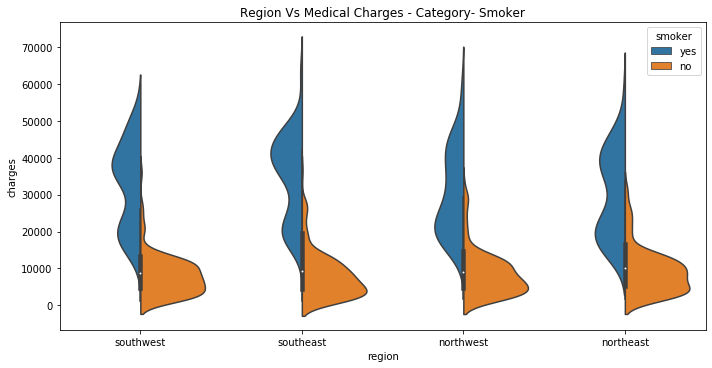

In [34]:
plt.figure(figsize=(10,5))
sns.violinplot(x='region', y= 'charges', data=data, hue='smoker', split=True)

plt.tight_layout()
plt.title("Region Vs Medical Charges - Category- Smoker")

Text(0.5, 1, 'No. of Children Vs Medical Charges - Category- Smoker')

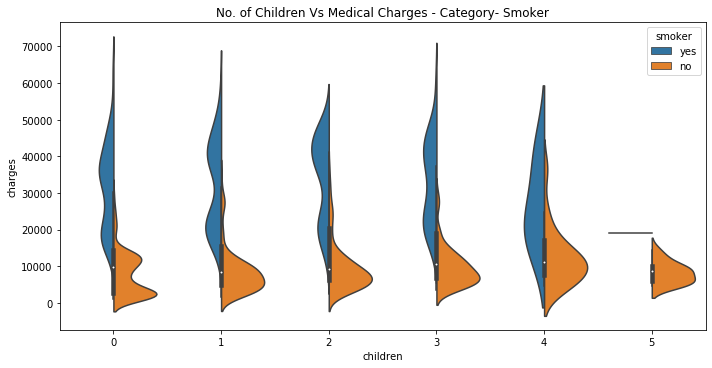

In [35]:
plt.figure(figsize=(10,5))
sns.violinplot(x='children', y= 'charges', data=data, hue='smoker', split=True)

plt.tight_layout()
plt.title("No. of Children Vs Medical Charges - Category- Smoker")

Text(0.5, 1, 'Age Vs Medical Charges - Category- Smoker')

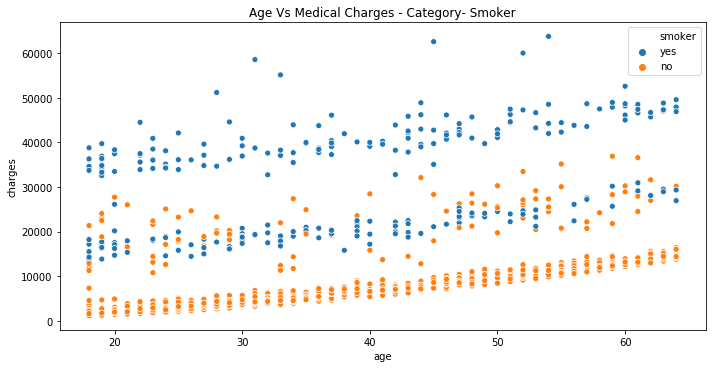

In [36]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='age', y= 'charges', data=data, hue='smoker')

plt.tight_layout()
plt.title("Age Vs Medical Charges - Category- Smoker")

Text(0.5, 1, 'BMI Vs Medical Charges - Category- Smoker')

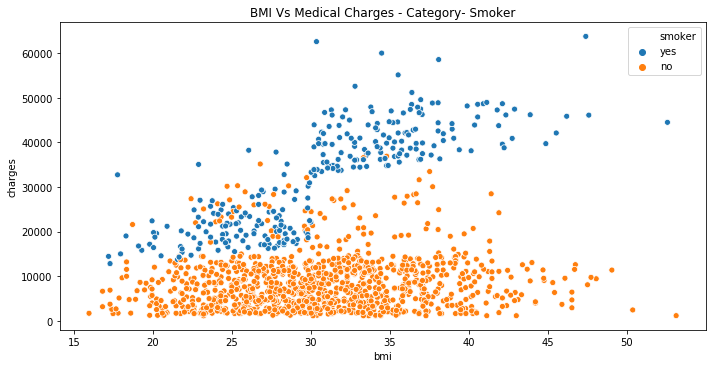

In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='bmi', y= 'charges', data=data, hue='smoker')

plt.tight_layout()
plt.title("BMI Vs Medical Charges - Category- Smoker")

## Analysis 

### From the above plots its significant that smokers vs non-smokers corrleation with the charges when analysed over other independent parameters

# Data-Preprocessing

## One-Hot Encoding

In [38]:
sex = pd.get_dummies(data['sex'], drop_first=True)
smoker = pd.get_dummies(data['smoker'], drop_first=True)
region= pd.get_dummies(data['region'], drop_first=True)

In [39]:
data = pd.concat([data,sex,smoker,region], axis=1)

In [40]:
data.head()

,age,sex,bmi,children,smoker,region,charges,male,yes,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [41]:
data.drop(['sex','smoker','region'], axis=1, inplace=True)

In [42]:
data.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [43]:
data.rename({'male':'sex','yes':'smoker'},inplace=True, axis=1)

In [44]:
data.head()

,age,bmi,children,charges,sex,smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## Correlation Matrix

In [45]:
data.corr()

,age,bmi,children,charges,sex,smoker,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


## Heatmap

(9.0, 0.0)

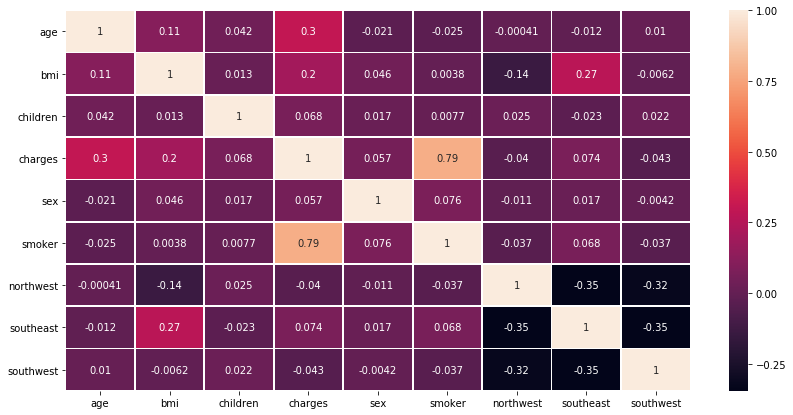

In [46]:
plt.figure(figsize=(14,7))
df_corr = data.corr()
ax = sns.heatmap(df_corr, annot=True, linecolor='white', linewidths=0.8) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Analysis
### A strong correlation can be observed between smoker attribute and charge from the heat map, which is followed by age and BMI
### Other factors seem to have less correlation with charge. 


# Regression Model - Analysis

In [47]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex', 'smoker', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

## Analysis of OLS 

## Strong correlation of BMI, smoking, age with charge 

In [48]:
X= data[['smoker','age','bmi']]
y=data['charges']

In [49]:
import statsmodels.api as sm
X_t = sm.add_constant(X)
model1=sm.OLS(y,X_t)
result=model1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Fri, 11 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:54:13   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.168e+04    937.569    -12.454      0.0

### Residual calculation from above OLS

In [50]:
predictedValues = result.predict()
print(predictedValues)
#print predictedValues

res = y - predictedValues

[26079.21861526  3889.73745805  6236.79872129 ...  4883.39206713
  2097.13732413 37357.67296584]


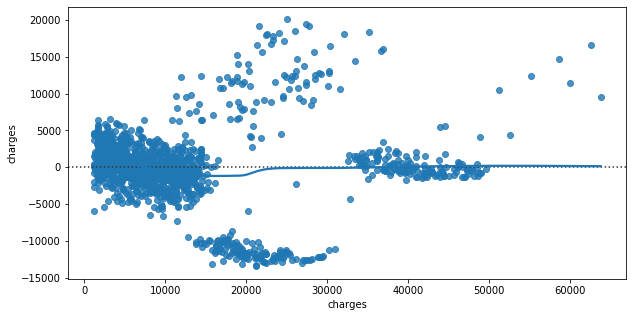

In [51]:
plt.figure(figsize=(10,5))
sns.residplot(x=y, y=res, lowess=True)

## Analysis

###  Adjusted R-squared is 0.747 which indicates good correlation between the predictors and target variable. From the P value (P¡0.000) we can conclude that the model is good and that the predictor variables are all significant. The coefficient for age is 259.55, BMI is 322.62 and smoker is 238223.68. The intercept is at -11676.83. Thus the model for predicting charges using smoking, age, BMI becomes,

### charges = -11676.83 + (238223.68 * smoker) + (259.55 *age) + (322.62 * BMI) + error


## OLS for all the Predictor Variables

In [52]:
X=data[['age', 'bmi', 'children', 'sex', 'smoker', 'northwest',
       'southeast', 'southwest']]
y=data['charges']

In [53]:
import statsmodels.api as sm
X_t = sm.add_constant(X)
model1=sm.OLS(y,X_t)
result=model1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 11 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:54:13   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.194e+04    987.819    -12.086      0.0

## Analysis

### In this model the adjusted R score is 0.749 which is slightly better than the previous model. While looking at the p values, it is observed that 'SEX' & 'NorthWest' have P value > 0.05. 

### Thus we remove the values and reevaluate the model.

### OLS calculation after removing 'SEX', & 'North-west'

In [54]:
X_n=data[['age', 'bmi', 'children', 'smoker',
       'southeast', 'southwest']]
y=data['charges']

In [55]:
import statsmodels.api as sm
X_t1 = sm.add_constant(X_n)
model1=sm.OLS(y,X_t1)
result=model1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.3
Date:                Fri, 11 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:54:13   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.217e+04    949.538    -12.812      0.0

### Residual calculation from above OLS

In [56]:
predictedValues = result.predict()
print(predictedValues)
#print predictedValues

res = y - predictedValues

[25226.9619277   3509.72497141  6762.12333875 ...  4081.19613796
  1185.95297306 37200.1859254 ]


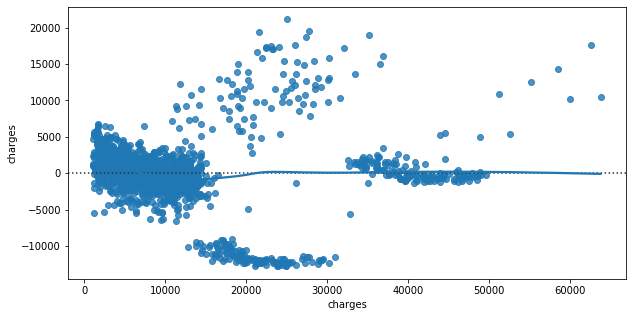

In [57]:
plt.figure(figsize=(10,5))
sns.residplot(x=y, y=res, lowess=True)

## Analysis

### After removing the above predictors the ajusted r squared improved by 0.01. Hence the best model after evaluation is last model with all the predictors excluding (sex, northwest)


## Residual Plot Analysis

### The dots are not randomly placed around the horizontal zero lines. It seems that there are identifiable 3 groups. Thus as per each group, there are differences invariance across the residuals. Also there is an increasing variance across the residuals and there might indicate a non-linear relationship between the charge and the predictor.


### Checking for multicollinearity - VIF Score

In [58]:
X_2 = data[['age', 'bmi', 'children', 'smoker',
       'southeast', 'southwest']]
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif["features"] = X_2.columns

In [59]:
vif

,VIF Factor,features
0,7.609759,age
1,9.532951,bmi
2,1.801568,children
3,1.251272,smoker
4,1.694726,southeast
5,1.509771,southwest


## Analysis

### Checking the multicollinearity, variance inflation factor (VIF) is used. The VIF should not be higher than 10, and our result shows all the predictors have value less than 10

## Data Pre-Processing 

In [60]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X_n,y,test_size = 0.2, random_state=101)

## Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [65]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
predict_lr = lr.predict(X_test)

In [68]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predict_lr))
print('MSE:', metrics.mean_squared_error(y_test, predict_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_lr)))
print('r2:', metrics.r2_score(y_test, predict_lr))

MAE: 4030.2176766162193
MSE: 33632032.48407479
RMSE: 5799.3131045042555
r2: 0.7616617184502601


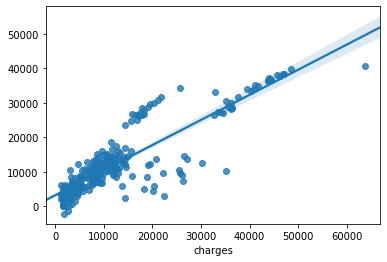

In [69]:
sns.regplot(y_test, predict_lr)

In [73]:
from sklearn.model_selection import cross_val_score
scores_lr = cross_val_score(lr, X_train, y_train, cv=10)
print('Accuracy {:.2f} '.format(scores_lr.mean()*100))
print('Standard_deviation {:.2f} '.format(scores_lr.std()*100))

Accuracy 73.95 
Standard_deviation 4.70 


## Decision Tree Regressor

In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid = [{'max_depth':np.arange(1, 21),
               'min_samples_split':np.arange(2,10),
              'min_samples_leaf':[1,2,3,4,5,6]}]
grid_cv= GridSearchCV(DecisionTreeRegressor(random_state=101), param_grid)
grid_cv.fit(X_train,y_train)
grid_cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [80]:
tree = DecisionTreeRegressor(criterion='mse', max_depth=grid_cv.best_params_['max_depth'], 
                             min_samples_leaf=grid_cv.best_params_['min_samples_leaf'], min_samples_split=2)

In [81]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [108]:
predict_tree = tree.predict(X_test)

In [109]:
scores_tree = cross_val_score(tree, X_train, y_train, cv=10)
print('Accuracy {:.2f} '.format(scores_tree.mean()*100))
print('Standard_deviation {:.2f} '.format(scores_tree.std()*100))

Accuracy 84.46 
Standard_deviation 4.36 


In [110]:
print('MAE:', metrics.mean_absolute_error(y_test, predict_tree))
print('MSE:', metrics.mean_squared_error(y_test, predict_tree))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_tree)))
print('r2:', metrics.r2_score(y_test, predict_tree))

MAE: 2683.218730729348
MSE: 19447858.63551255
RMSE: 4409.972634326947
r2: 0.8621799259618002


## Random Forest Regressor

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
#stimator = RandomForestRegressor(random_state=101)
param_grid = { 
            "n_estimators"  : [10,20,30,40,50,60,70,80,90,100],
            "max_depth": np.arange(1,30),
            "min_samples_split": np.arange(2,10)
            }
grid_cv= GridSearchCV(RandomForestRegressor(random_state=101), param_grid)
grid_cv.fit(X_train,y_train)
grid_cv.best_params_

{'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 30}

In [100]:
tree_rf = RandomForestRegressor(n_estimators=grid_cv.best_params_['n_estimators'], 
                                max_depth=grid_cv.best_params_['max_depth'],
                               min_samples_split=2)

In [111]:
tree_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [112]:
predict_tree_rf = tree.predict(X_test)

In [113]:
scores_tree_rf = cross_val_score(tree_rf, X_train, y_train, cv=10)
print('Accuracy {:.2f} '.format(scores_tree_rf.mean()*100))
print('Standard_deviation {:.2f} '.format(scores_tree_rf.std()*100))

Accuracy 85.43 
Standard_deviation 4.58 


In [114]:
print('MAE:', metrics.mean_absolute_error(y_test, predict_tree_rf))
print('MSE:', metrics.mean_squared_error(y_test, predict_tree_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_tree_rf)))
print('r2:', metrics.r2_score(y_test, predict_tree_rf))

MAE: 2683.218730729348
MSE: 19447858.63551255
RMSE: 4409.972634326947
r2: 0.8621799259618002


## XGBoost 

In [116]:
from xgboost import XGBRegressor
regressor = XGBRegressor(random_state=101)

In [117]:
regressor.fit(X_train,y_train)

[01:07:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [118]:
predict_xgb = regressor.predict(X_test)


In [119]:
scores_tree_rf = cross_val_score(regressor, X_train, y_train, cv=10)
print('Accuracy {:.2f} '.format(scores_tree_rf.mean()*100))
print('Standard_deviation {:.2f} '.format(scores_tree_rf.std()*100))

[01:07:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [120]:
print('MAE:', metrics.mean_absolute_error(y_test, predict_xgb))
print('MSE:', metrics.mean_squared_error(y_test, predict_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_xgb)))
print('r2:', metrics.r2_score(y_test, predict_xgb))

MAE: 2489.143731544135
MSE: 19666291.51409917
RMSE: 4434.669267724389
r2: 0.8606319696513705


## Thanks